In [ ]:
# Code to generate windows for X_train, X_test, y_train and y_test for the training. Uses the code generate_dataset.py

In [1]:
import os
current_pwd = os.getcwd()

path_generate_dataset = r"C:\Users\Rafael\OneDrive - Delft University of Technology\Final code\3. Generate dataset" 
os.chdir(path_generate_dataset)
from generate_dataset import generate_dataset
os.chdir(current_pwd)

import numpy as np
import json

Labels: {'shot': 0, 'sprint': 1, 'jump': 2, 'jog': 3, 'pass': 4, 'turn90': 5, 'turn180': 6}

0/1701 windows processed
100/1701 windows processed
200/1701 windows processed
300/1701 windows processed
400/1701 windows processed
500/1701 windows processed
600/1701 windows processed
700/1701 windows processed
800/1701 windows processed
900/1701 windows processed
1000/1701 windows processed
1100/1701 windows processed
1200/1701 windows processed
1300/1701 windows processed
1400/1701 windows processed
1500/1701 windows processed
1600/1701 windows processed
1700/1701 windows processed
Dataset generated

(1701, 30, 500)
Order of sensors: ['leftShankAccX', 'leftShankAccY', 'leftShankAccZ', 'leftShankGyroX', 'leftShankGyroY', 'leftShankGyroZ', 'rightShankAccX', 'rightShankAccY', 'rightShankAccZ', 'rightShankGyroX', 'rightShankGyroY', 'rightShankGyroZ', 'leftThighAccX', 'leftThighAccY', 'leftThighAccZ', 'leftThighGyroX', 'leftThighGyroY', 'leftThighGyroZ', 'rightThighAccX', 'rightThighAccY', 'rig

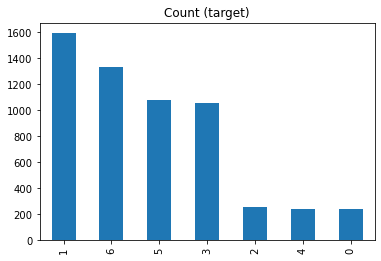

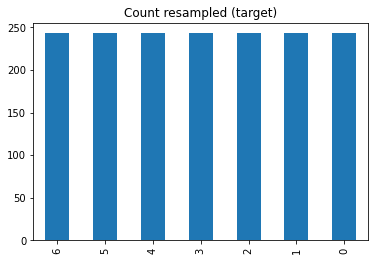

In [5]:
### Parameters ###

# Possible categories from the training/validation windows
categories = {
    0: 'Jog (10m)',
    1: 'Sub maximal run (10m)',
    2: 'Maximal run (10m)',
    3: 'Jog with rapid stop (10m)',
    4: 'Sub maximal run with rapid stop (10m)',
    5: 'Maximal run with rapid stop (10m)',
    6: 'Jog with 180 deg turn (10m)',
    7: 'Sub maximal run with 180 deg turn (10m)',
    8: 'Maximal run with 180 deg turn (10m)',
    9: 'Jog followed by 90 deg cut (5m)',
    10: 'Sub maximal run followed by 90 deg cut (5m)',
    11: 'Maximal run followed by 90 deg cut (5m)',
    12: 'Standing jump',
    13: 'Jump with a small run-up',
    14: 'Jump with a small run-up',
    15: 'Short pass',
    16: 'Long pass',
    17: 'Shot',
    18: 'Maximal sprint (30m)',
    -1: 'Low activity'
}

# Define categories to use. Choose numbers to group from dictionary of above
categories_dict = {'shot': [17],
                  'sprint': [18],
                  'jump': [12],
                  'jog': [0],
                  'pass': [15],
                  'turn90': [9],
                  'turn180': [6]}

# Define parameters to use in function generate_dataset.py
file_windows_activities = r'C:/Users/Rafael/OneDrive - Delft University of Technology/Data/windows/times_windows_all_1_0.75.csv'

sensors_bodypart = 'all'
sensors_type = ['Acc','Gyro']
sensors_axis = 'all'
standardize = False
type_resample = 'under'
test_size = 0.3
random_state = 0


# Define folder name where the dataset will be saved
info_dataset = '1s_ssjjp' #1s_ssjjp means windows of 1 second, with classes shots, sprints, jumps, jogs and passes

# Folder where the dataset will be saved
savedir = r'C:\Users\Rafael\OneDrive - Delft University of Technology\Modeling\Datasets\{}\{}_{}_{}_{}/'.format(info_dataset,
                                                                                                           sensors_bodypart,
                                                                                                          sensors_type,
                                                                                                          sensors_axis,
                                                                                                          standardize)

In [ ]:
## Main 

# Build dataset
X_train, X_test, y_train, y_test, sensors, labels_dict = generate_dataset(categories_dict = categories_dict,
                                                            file_windows_activities = file_windows_activities,
                                                            sensors_bodypart = sensors_bodypart, 
                                                            sensors_type = sensors_type,
                                                            sensors_axis = sensors_axis,
                                                            standardize = standardize,
                                                            type_resample = type_resample,
                                                            test_size = test_size,
                                                            random_state = random_state)

In [6]:
## Save dataset

# Helper lines to name the folders where the dataset is saved
sensors_bodypart = '-'.join(sensors_bodypart) if isinstance(sensors_bodypart, list) else sensors_bodypart
sensors_type = '-'.join(sensors_type) if isinstance(sensors_type, list) else sensors_type
sensors_axis = '-'.join(sensors_axis) if isinstance(sensors_axis, list) else sensors_axis
standardize = 'standardized' if standardize else 'unstandardized'


# Create folder if does not exist
if not os.path.exists(savedir):
    os.makedirs(savedir)

    
# Save datasets
np.save(savedir + 'X_train.npy' , X_train)
np.save(savedir + 'X_test.npy' , X_test)
np.save(savedir + 'y_train.npy' , y_train)
np.save(savedir + 'y_test.npy' , y_test)
np.save(savedir + 'sensors.npy' , sensors)

dict_file = open(savedir + 'labels_dict.json', "w")
json.dump(labels_dict, dict_file)
dict_file.close()